# **Wallmart Case Study**

# General Observations

In [ ]:
import math as m
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom,geom
import math
from scipy.stats import norm
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp
from scipy.stats import binom,t
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/content/sample_data/Wallmart.csv")

In [ ]:
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category  \
count  5.500680e+05  550068.000000   550068.000000     550068.000000   
mean   1.003029e+06       8.076707        0.409653          5.404270   
std    1.727592e+03       6.522660        0.491770          3.936211   
min    1.000001e+06       0.000000        0.000000          1.000000   
25%    1.001516e+06       2.000000        0.000000          1.000000   
50%    1.003077e+06       7.000000        0.000000          5.000000   
75%    1.004478e+06      14.000000        1.000000          8.000000   
max    1.006040e+06      20.000000        1.000000         20.000000   

            Purchase  
count  550068.000000  
mean     9263.968713  
std      5023.065394  
min        12.000000  
25%      5823.000000  
50%      8047.000000  
75%     12054.000000  
max     23961.000000

In [ ]:
df['Marital_Status'].replace(to_replace = 0, value = 'Unmarried', inplace = True)
df['Marital_Status'].replace(to_replace = 1, value = 'Married', inplace = True)

In [ ]:
df

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                               2      Unmarried                 3      8370  
1                               2      Unmarried                 1     15200  
2                               2      Unmarried                12      1422  
3                               2      Unmarried                12      1057  
4                              4+      Unmarried                 8      7969  
...                           ...            ...               ...       ...  
550063                          1        Married                20       368  
550064                          3      Unmarried                20       371  
550065                         4+        Married                20       137  
550066                          2      Unmarried                20       365  
550067                         4+        Married                20       490  

[550068 rows x 10 columns]

In [ ]:
colname = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Occupation']
for col in colname:
    print("\nUnique values of ",col," are : ",list(df[col].unique()))



Unique values of  Gender  are :  ['F', 'M']

Unique values of  Age  are :  ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

Unique values of  City_Category  are :  ['A', 'C', 'B']

Unique values of  Stay_In_Current_City_Years  are :  ['2', '4+', '3', '1', '0']

Unique values of  Marital_Status  are :  ['Unmarried', 'Married']

Unique values of  Product_Category  are :  [3, 1, 12, 8, 5, 4, 2, 6, 14, 11, 13, 15, 7, 16, 18, 10, 17, 9, 20, 19]

Unique values of  Occupation  are :  [10, 16, 15, 7, 20, 9, 1, 12, 17, 0, 3, 4, 11, 8, 19, 2, 18, 5, 14, 13, 6]


In [ ]:
df['Occupation'].describe()

count    550068.000000
mean          8.076707
std           6.522660
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: Occupation, dtype: float64

In [ ]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
df.groupby(['Gender'])['Purchase'].describe()

count         mean          std   min     25%     50%      75%  \
Gender                                                                      
F       135809.0  8734.565765  4767.233289  12.0  5433.0  7914.0  11400.0   
M       414259.0  9437.526040  5092.186210  12.0  5863.0  8098.0  12454.0   

            max  
Gender           
F       23959.0  
M       23961.0

In [ ]:
df.groupby(['Marital_Status'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
Marital_Status                                                             
Married         225337.0  9261.174574  5016.897378  12.0  5843.0  8051.0   
Unmarried       324731.0  9265.907619  5027.347859  12.0  5605.0  8044.0   

                    75%      max  
Marital_Status                    
Married         12042.0  23961.0  
Unmarried       12061.0  23961.0

In [ ]:
df.groupby(['City_Category'])['Purchase'].describe()

count         mean          std   min     25%     50%  \
City_Category                                                             
A              147720.0  8911.939216  4892.115238  12.0  5403.0  7931.0   
B              231173.0  9151.300563  4955.496566  12.0  5460.0  8005.0   
C              171175.0  9719.920993  5189.465121  12.0  6031.5  8585.0   

                   75%      max  
City_Category                    
A              11786.0  23961.0  
B              11986.0  23960.0  
C              13197.0  23961.0

# Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df.groupby(['City_Category'])['User_ID'].nunique()


City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64

In [ ]:

df.groupby(['Marital_Status'])['User_ID'].nunique()

Marital_Status
Married      2474
Unmarried    3417
Name: User_ID, dtype: int64

# Visual Analysis - Univariate & Bivariate

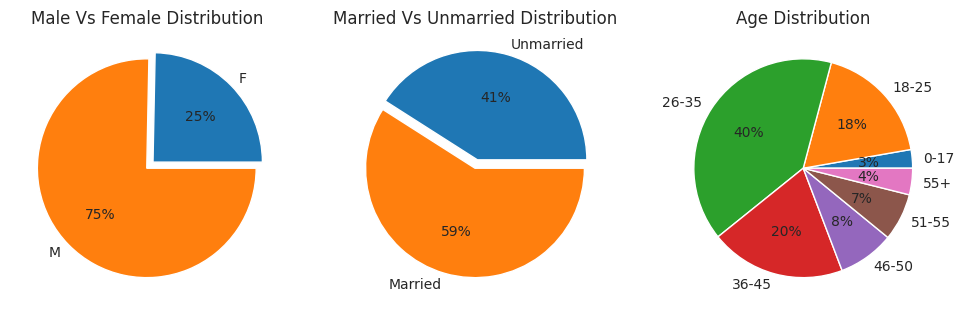

In [ ]:
fig= plt.figure(figsize=(12,5))
a1 = fig.add_subplot(131)
labels = ['F', 'M']
a1.pie(df.groupby('Gender')['Gender'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
a1.set_title('Male Vs Female Distribution')


a2 = fig.add_subplot(132)
labels = ['Unmarried','Married']
a2.pie(df.groupby('Marital_Status')['Marital_Status'].count(), labels = labels, explode = (0.08,0), autopct = '%0.0f%%')
a2.set_title('Married Vs Unmarried Distribution')

a3 = fig.add_subplot(133)
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
a3.pie(df.groupby('Age')['Age'].count(), labels=labels,  autopct = '%0.0f%%')
a3.set_title('Age Distribution')
plt.show()

Inference:
- Out of the buyers 75% are male and 25% are female
- Out of the buyers 59% are married and 41% are Unmarried
-Most buyers are between age range of 26-35

In [ ]:
df_male = df[df['Gender']=='M']

In [ ]:
df_male

User_ID Product_ID Gender    Age  Occupation City_Category  \
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
...         ...        ...    ...    ...         ...           ...   
550057  1006023  P00370853      M  26-35           0             C   
550058  1006024  P00372445      M  26-35          12             A   
550060  1006026  P00371644      M  36-45           6             C   
550062  1006032  P00372445      M  46-50           7             A   
550063  1006033  P00372445      M  51-55          13             B   

       Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
4                              4+      Unmarried                 8      7969  
5                               3      Unmarried                 1     15227  
6                               2        Married                 1     19215  
7                               2        Married                 1     15854  
8                               2        Married                 1     15686  
...                           ...            ...               ...       ...  
550057                          2        Married                19        61  
550058                          0        Married                20       121  
550060                          1        Married                20       494  
550062                          3      Unmarried                20       473  
550063                          1        Married                20       368  

[414259 rows x 10 columns]

In [ ]:
df_male.describe()

User_ID    Occupation  Product_Category      Purchase
count  4.142590e+05  414259.00000     414259.000000  414259.00000
mean   1.002996e+06       8.51475          5.301512    9437.52604
std    1.706494e+03       6.55379          4.006275    5092.18621
min    1.000002e+06       0.00000          1.000000      12.00000
25%    1.001505e+06       3.00000          1.000000    5863.00000
50%    1.003041e+06       7.00000          5.000000    8098.00000
75%    1.004411e+06      15.00000          8.000000   12454.00000
max    1.006040e+06      20.00000         20.000000   23961.00000

In [ ]:
df_male['User_ID'].nunique()

4225

In [ ]:
df_female = df[df['Gender']=='F']

In [ ]:
df_female

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
14      1000006  P00231342      F  51-55           9             A   
...         ...        ...    ...    ...         ...           ...   
550061  1006029  P00372445      F  26-35           1             C   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                               2      Unmarried                 3      8370  
1                               2      Unmarried                 1     15200  
2                               2      Unmarried                12      1422  
3                               2      Unmarried                12      1057  
14                              1      Unmarried                 5      5378  
...                           ...            ...               ...       ...  
550061                          1        Married                20       599  
550064                          3      Unmarried                20       371  
550065                         4+        Married                20       137  
550066                          2      Unmarried                20       365  
550067                         4+        Married                20       490  

[135809 rows x 10 columns]

In [ ]:
df_female.describe()

User_ID     Occupation  Product_Category       Purchase
count  1.358090e+05  135809.000000     135809.000000  135809.000000
mean   1.003130e+06       6.740540          5.717714    8734.565765
std    1.786631e+03       6.239639          3.696752    4767.233289
min    1.000001e+06       0.000000          1.000000      12.000000
25%    1.001569e+06       1.000000          3.000000    5433.000000
50%    1.003159e+06       4.000000          5.000000    7914.000000
75%    1.004765e+06      11.000000          8.000000   11400.000000
max    1.006039e+06      20.000000         20.000000   23959.000000

**Are women spending more money per transaction than men? Why or Why not?**

- No, Men have mean purchase value of 9437.52 however women have mena purchase value of 8734.56.This might be due to the fact that generally Men high earners or have higher incomes in various jobs than women.Also, they are the bread earners and mostly responsible for buying the necesities for the home. Hence, they tend to spend more at the stores.

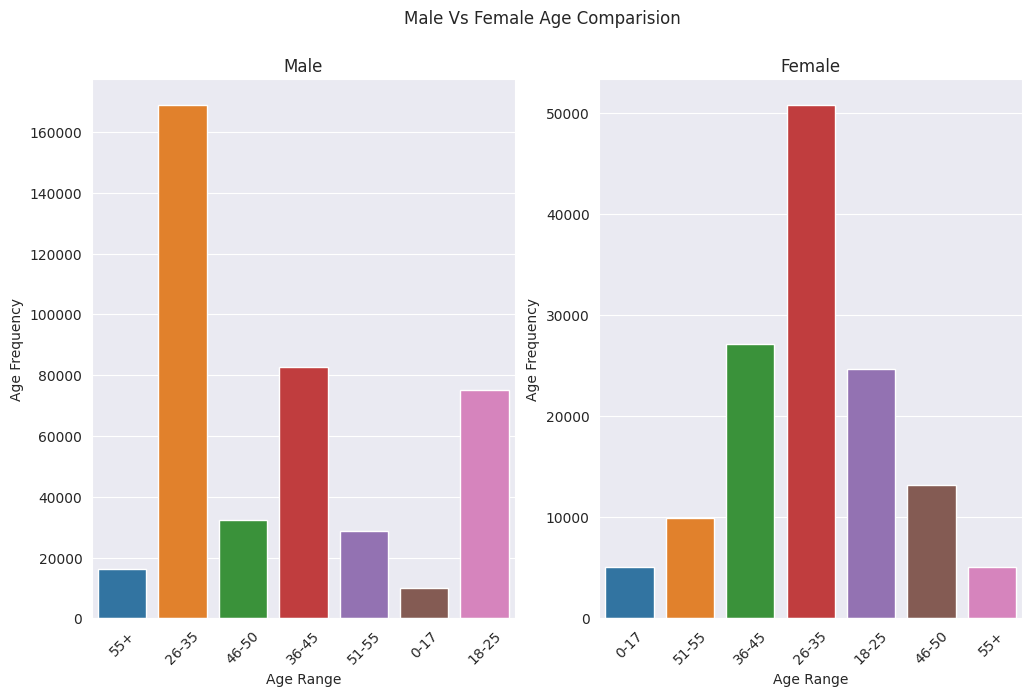

In [ ]:
plt.figure(figsize = (12,7))
plt.suptitle('Male Vs Female Age Comparision')

plt.subplot(1,2,1)
sns.countplot(data=df_male,x='Age')
plt.title("Male")
plt.xticks(rotation=45)
plt.xlabel('Age Range')
plt.ylabel('Age Frequency')

plt.subplot(1,2,2)
sns.countplot(data=df_female,x='Age')
plt.title("Female")
plt.xticks(rotation=45)
plt.xlabel('Age Range')
plt.ylabel('Age Frequency')

plt.show()

Inference:

- Most buyers for Males are between 26-35
- Most buyers for Females are between 36-45

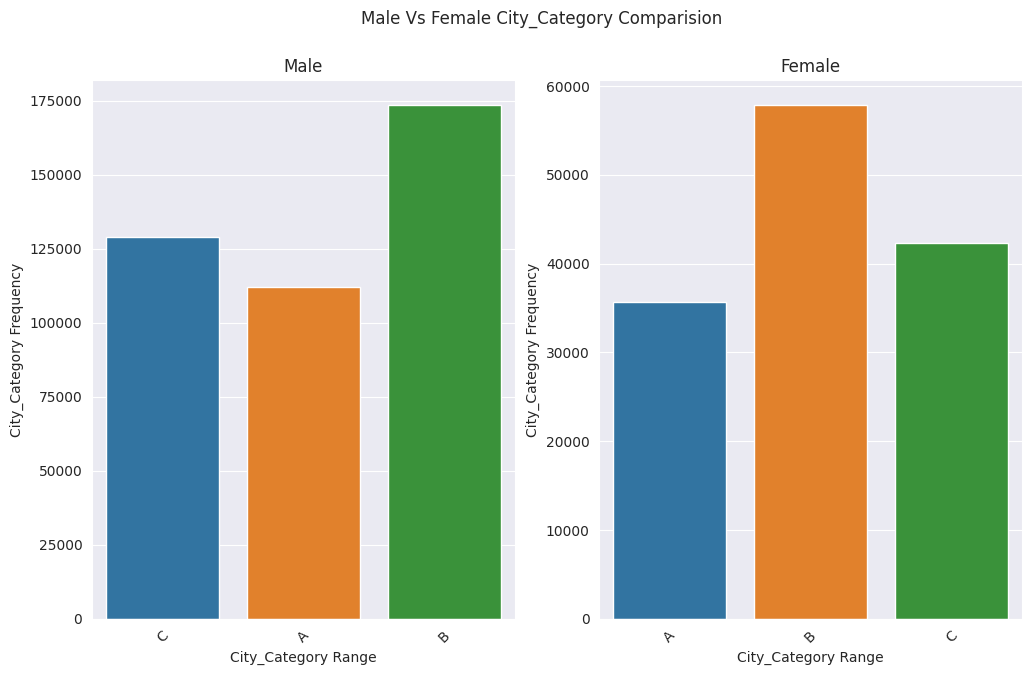

In [ ]:
plt.figure(figsize = (12,7))
plt.suptitle('Male Vs Female City_Category Comparision')

plt.subplot(1,2,1)
sns.countplot(data=df_male,x='City_Category')
plt.title("Male")
plt.xticks(rotation=45)
plt.xlabel('City_Category Range')
plt.ylabel('City_Category Frequency')

plt.subplot(1,2,2)
sns.countplot(data=df_female,x='City_Category')
plt.title("Female")
plt.xticks(rotation=45)
plt.xlabel('City_Category Range')
plt.ylabel('City_Category Frequency')

plt.show()

Inference:

- Most buyers are from city category B followed by C and A city categories

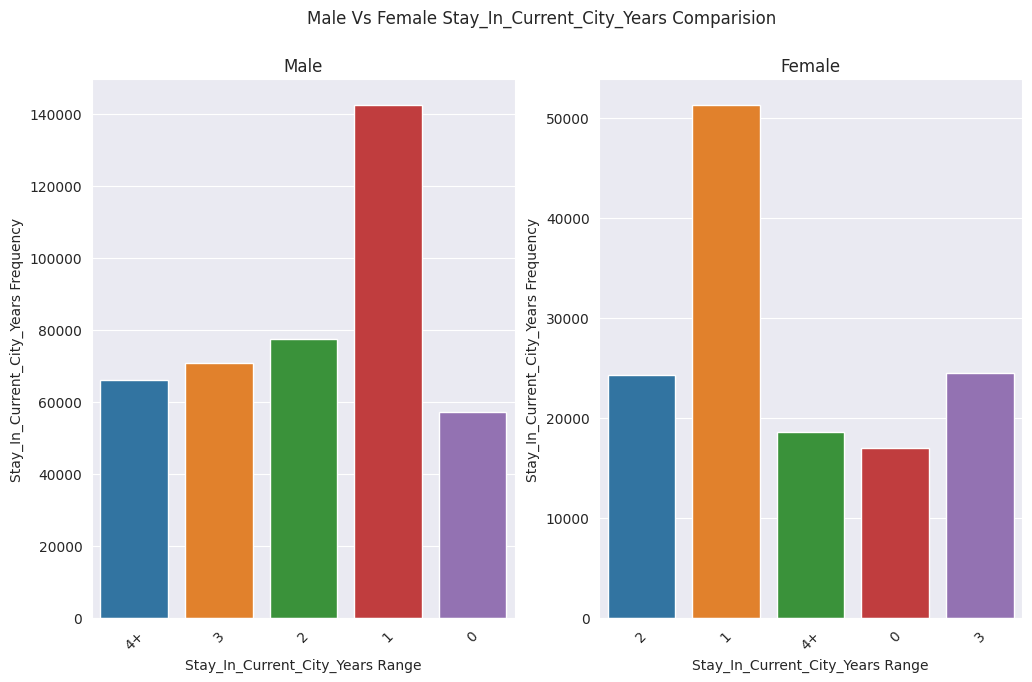

In [ ]:
plt.figure(figsize = (12,7))
plt.suptitle('Male Vs Female Stay_In_Current_City_Years Comparision')

plt.subplot(1,2,1)
sns.countplot(data=df_male,x='Stay_In_Current_City_Years')
plt.title("Male")
plt.xticks(rotation=45)
plt.xlabel('Stay_In_Current_City_Years Range')
plt.ylabel('Stay_In_Current_City_Years Frequency')

plt.subplot(1,2,2)
sns.countplot(data=df_female,x='Stay_In_Current_City_Years')
plt.title("Female")
plt.xticks(rotation=45)
plt.xlabel('Stay_In_Current_City_Years Range')
plt.ylabel('Stay_In_Current_City_Years Frequency')

plt.show()

Inference:

- Buyers which stay in the city for 1 year buy most of the products.
- THis is true for both Male and Female

In [ ]:
df_married = df[df['Marital_Status']=='Married']

In [ ]:
df_married['User_ID'].count()

225337

In [ ]:
df_unmarried = df[df['Marital_Status']=='Unmarried']

In [ ]:
df_unmarried['User_ID'].count()

324731

In [ ]:
df_married

User_ID Product_ID Gender    Age  Occupation City_Category  \
6       1000004  P00184942      M  46-50           7             B   
7       1000004  P00346142      M  46-50           7             B   
8       1000004   P0097242      M  46-50           7             B   
9       1000005  P00274942      M  26-35          20             A   
10      1000005  P00251242      M  26-35          20             A   
...         ...        ...    ...    ...         ...           ...   
550060  1006026  P00371644      M  36-45           6             C   
550061  1006029  P00372445      F  26-35           1             C   
550063  1006033  P00372445      M  51-55          13             B   
550065  1006036  P00375436      F  26-35          15             B   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
6                               2        Married                 1     19215  
7                               2        Married                 1     15854  
8                               2        Married                 1     15686  
9                               1        Married                 8      7871  
10                              1        Married                 5      5254  
...                           ...            ...               ...       ...  
550060                          1        Married                20       494  
550061                          1        Married                20       599  
550063                          1        Married                20       368  
550065                         4+        Married                20       137  
550067                         4+        Married                20       490  

[225337 rows x 10 columns]

In [ ]:
df_unmarried

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550056  1006022  P00375436      M  26-35          17             C   
550059  1006025  P00370853      F  26-35           1             B   
550062  1006032  P00372445      M  46-50           7             A   
550064  1006035  P00375436      F  26-35           1             C   
550066  1006038  P00375436      F    55+           1             C   

       Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                               2      Unmarried                 3      8370  
1                               2      Unmarried                 1     15200  
2                               2      Unmarried                12      1422  
3                               2      Unmarried                12      1057  
4                              4+      Unmarried                 8      7969  
...                           ...            ...               ...       ...  
550056                         4+      Unmarried                20       254  
550059                          1      Unmarried                19        48  
550062                          3      Unmarried                20       473  
550064                          3      Unmarried                20       371  
550066                          2      Unmarried                20       365  

[324731 rows x 10 columns]

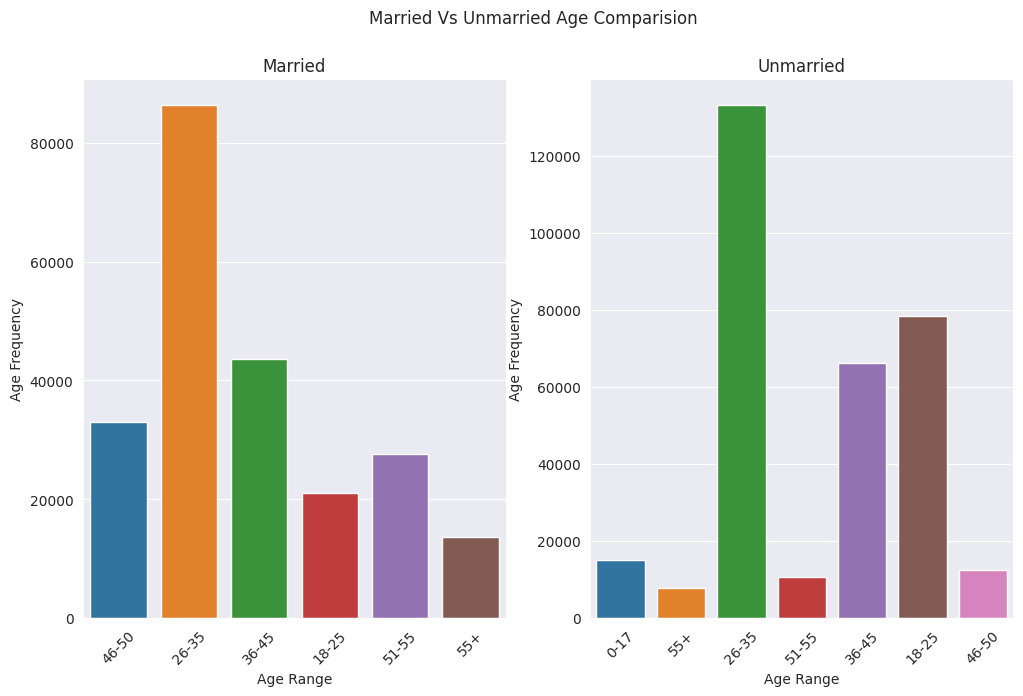

In [ ]:
plt.figure(figsize = (12,7))
plt.suptitle('Married Vs Unmarried Age Comparision')

plt.subplot(1,2,1)
sns.countplot(data=df_married,x='Age')
plt.title("Married")
plt.xticks(rotation=45)
plt.xlabel('Age Range')
plt.ylabel('Age Frequency')

plt.subplot(1,2,2)
sns.countplot(data=df_unmarried,x='Age')
plt.title("Unmarried")
plt.xticks(rotation=45)
plt.xlabel('Age Range')
plt.ylabel('Age Frequency')

plt.show()

Inference:
-People peolpe from Age range 26-35 are most buyers for both married and unmarried category

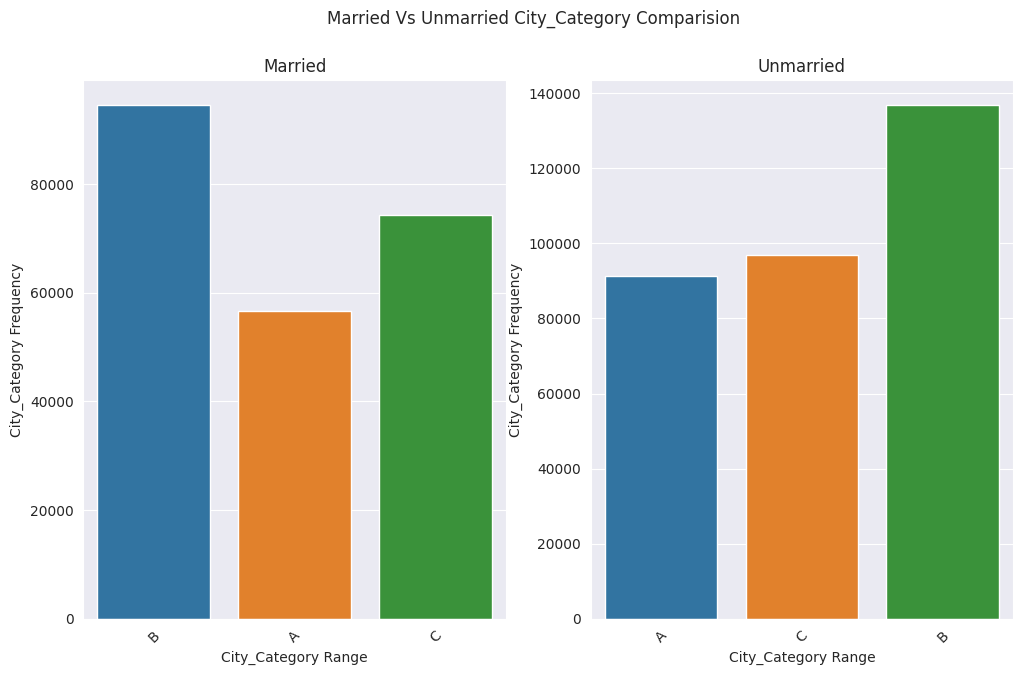

In [ ]:
plt.figure(figsize = (12,7))
plt.suptitle('Married Vs Unmarried City_Category Comparision')

plt.subplot(1,2,1)
sns.countplot(data=df_married,x='City_Category')
plt.title("Married")
plt.xticks(rotation=45)
plt.xlabel('City_Category Range')
plt.ylabel('City_Category Frequency')

plt.subplot(1,2,2)
sns.countplot(data=df_unmarried,x='City_Category')
plt.title("Unmarried")
plt.xticks(rotation=45)
plt.xlabel('City_Category Range')
plt.ylabel('City_Category Frequency')

plt.show()

Inference:
- Most buyers belong to city cateofy B for Married and Unmarried types

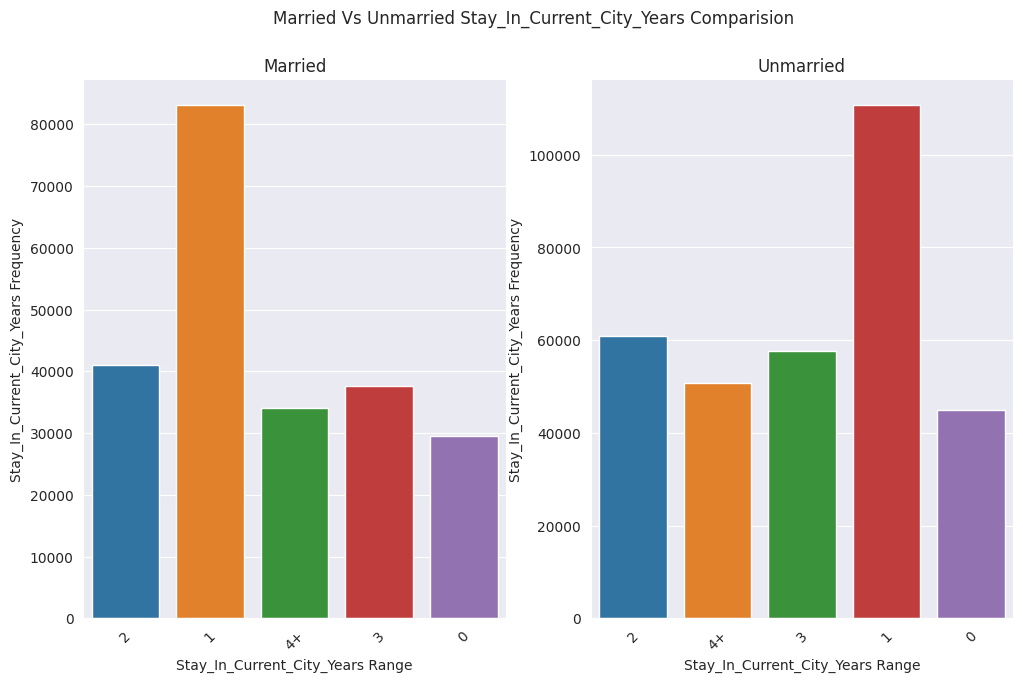

In [ ]:
plt.figure(figsize = (12,7))
plt.suptitle('Married Vs Unmarried Stay_In_Current_City_Years Comparision')

plt.subplot(1,2,1)
sns.countplot(data=df_married,x='Stay_In_Current_City_Years')
plt.title("Married")
plt.xticks(rotation=45)
plt.xlabel('Stay_In_Current_City_Years Range')
plt.ylabel('Stay_In_Current_City_Years Frequency')

plt.subplot(1,2,2)
sns.countplot(data=df_unmarried,x='Stay_In_Current_City_Years')
plt.title("Unmarried")
plt.xticks(rotation=45)
plt.xlabel('Stay_In_Current_City_Years Range')
plt.ylabel('Stay_In_Current_City_Years Frequency')

plt.show()

Inference:
- Most buyers have been in the current city for 1 year for both marrried and unmarried category

Text(0, 0.5, 'Product_Category Frequency')

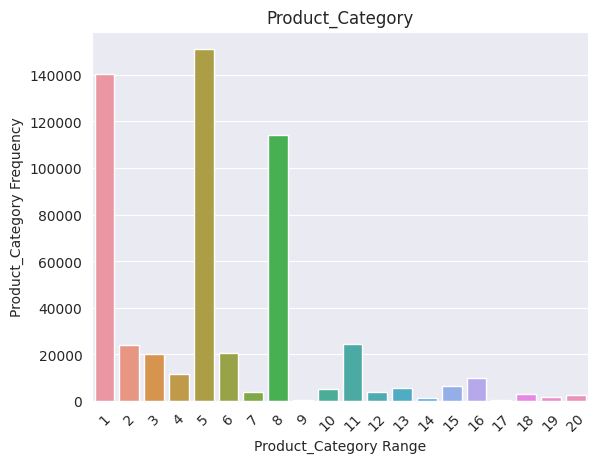

In [ ]:
sns.countplot(data=df,x='Product_Category')
plt.title("Product_Category")
plt.xticks(rotation=45)
plt.xlabel('Product_Category Range')
plt.ylabel('Product_Category Frequency')

Inference:
- Most sold Product Catoegory is 5.
- This is followed by category 1 and 8
- All other cateogries except category 5,1,8 have very low sales

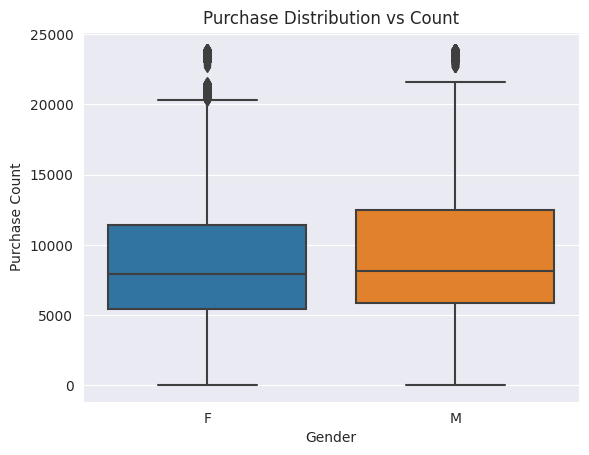

In [ ]:
sns.boxplot(data=df, y="Purchase", orient='v',x='Gender')
plt.title("Purchase Distribution vs Count")
plt.ylabel('Purchase Count')
plt.show()

Inference:
- The Median purchase for both male and female is similar
- However, the purchasse range for males is greater than females, hence having higher upper and lower limit.
- Females have more outliers than males buyers

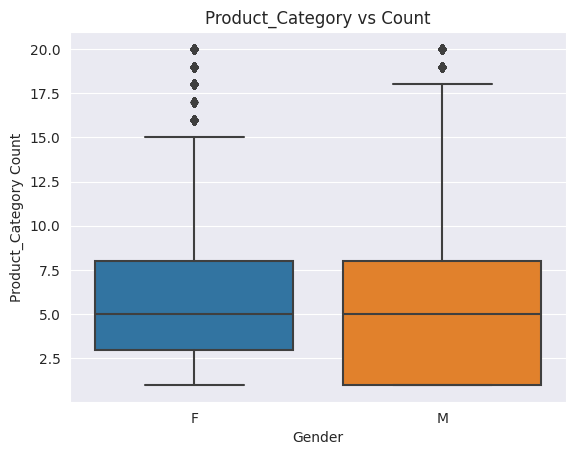

In [ ]:
sns.boxplot(data=df, y="Product_Category",orient='v',x='Gender')
plt.title("Product_Category vs Count")
plt.ylabel('Product_Category Count')
plt.show()


Inference:
- The Median product category for both male and female is product caegory 5
- Females have more outliers than males buyers in product category

<Axes: xlabel='Purchase', ylabel='Count'>

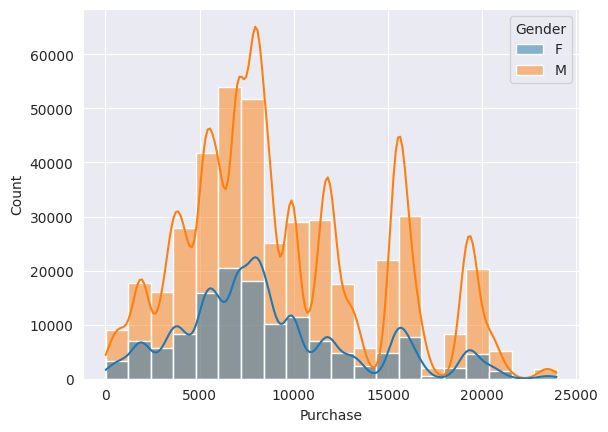

In [ ]:
sns.histplot(data = df, x='Purchase',bins=20, hue='Gender', kde=True)

Inference:

- Males have purchased more items than females in each range
- Most of the items bought are in the range of 5000-8000

<Axes: xlabel='Purchase', ylabel='Count'>

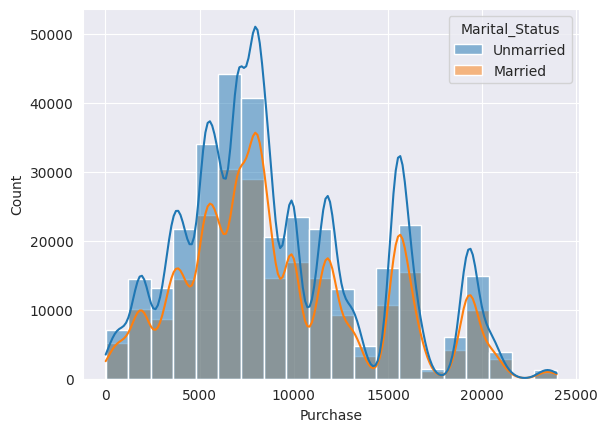

In [ ]:
sns.histplot(data = df, x='Purchase',bins=20, hue='Marital_Status', kde=True)

Inference:

- unmarried have purchased mroe items than married in each range
- Most of the items bought are in the range of 5000-8000

<ipython-input-225-f242bb07b723>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),


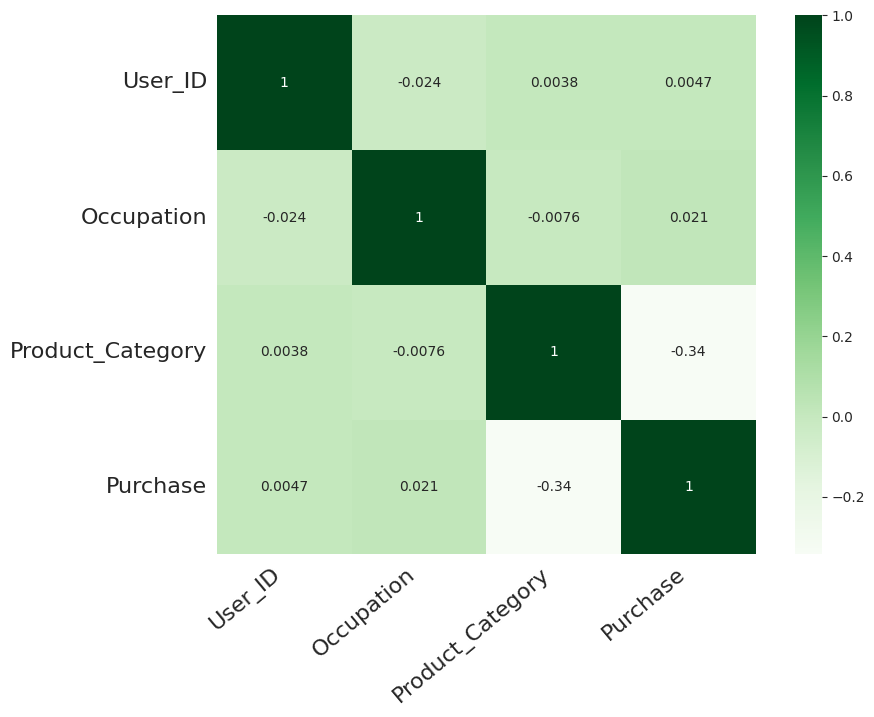

In [ ]:
plt.figure(figsize = (10, 7))
ax = sns.heatmap(df.corr(),
            annot=True,cmap='Greens',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "sans-serif",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "sans-serif",
    horizontalalignment='right')

plt.show()

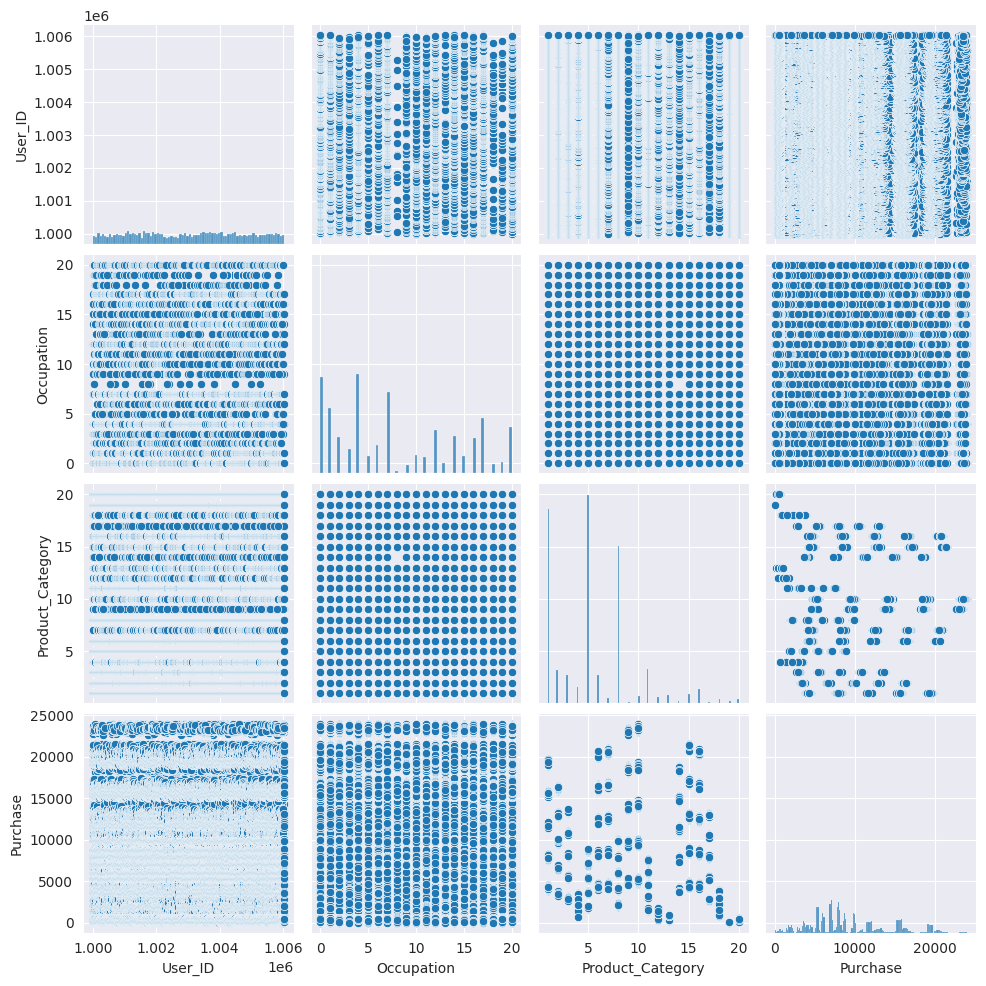

In [ ]:
sns.pairplot(df)

Missing Value & Outlier Detection

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.isnull().mean()

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

In [ ]:
df['Occupation'].isnull().sum()

0

In [ ]:
norm.interval(0.95,loc = df_female['Purchase'].mean(), scale=df_female['Purchase'].std()/(math.sqrt(df_female.shape[0])))

(8709.21154714068, 8759.919983170272)

In [ ]:
norm.interval(0.95,loc = df_male['Purchase'].mean(), scale=df_male['Purchase'].std()/(math.sqrt(df_male.shape[0])))

(9422.01944736257, 9453.032633581959)

In [ ]:
sample_300=[np.mean(df_male["Purchase"].sample(300)) for i in range(1000)]

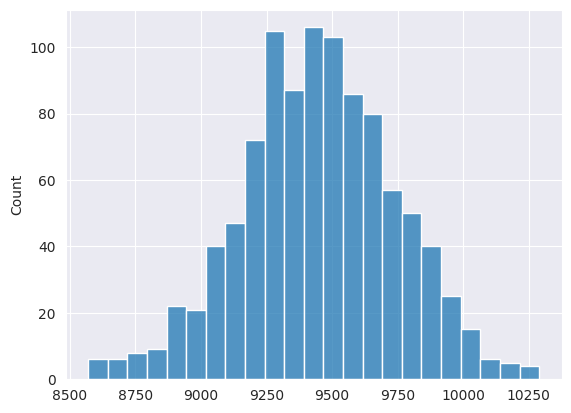

In [ ]:
sns.histplot(sample_300)
plt.show()

In [ ]:
np.mean(sample_300)

9445.790876666668

In [ ]:
norm.ppf(0.05)

-1.6448536269514729

In [ ]:
np.std(sample_300)/math.sqrt(300)

17.041369568865655

In [ ]:
[np.mean(sample_300) + (norm.ppf(0.05)*(np.std(sample_300)/math.sqrt(300))),np.mean(sample_300) + (norm.ppf(0.95)*(np.std(sample_300)/math.sqrt(300)))]

[9417.760318123099, 9473.821435210237]

# CLT Analysis for mean purchase with confidence 90% - Based on Gender

In [ ]:
def bootstrapping(sample1,sample2,sample_size,itr_size=1000,ci=90):
    #Confidence Interval
    ci = ci/100

    #Collecting samples from the overall data for any sample size
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

     #Calcualte the Z-Critical value
    alpha = (1 - (ci/100))/2
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1   = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2   = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)

    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",
              fontsize=14,family = "sans-serif")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    return None


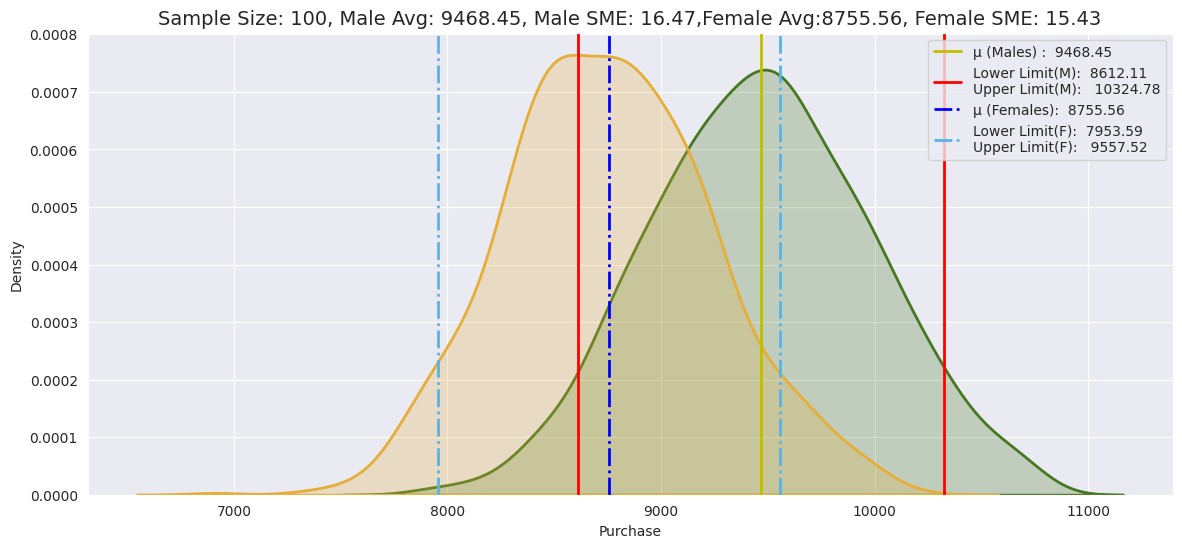

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],100)

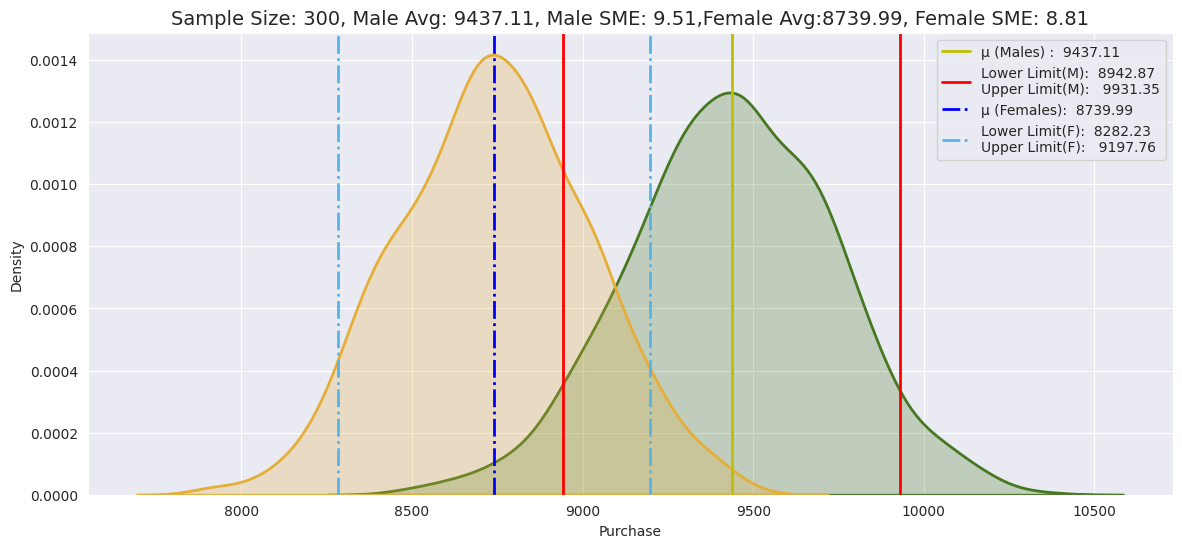

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],300)

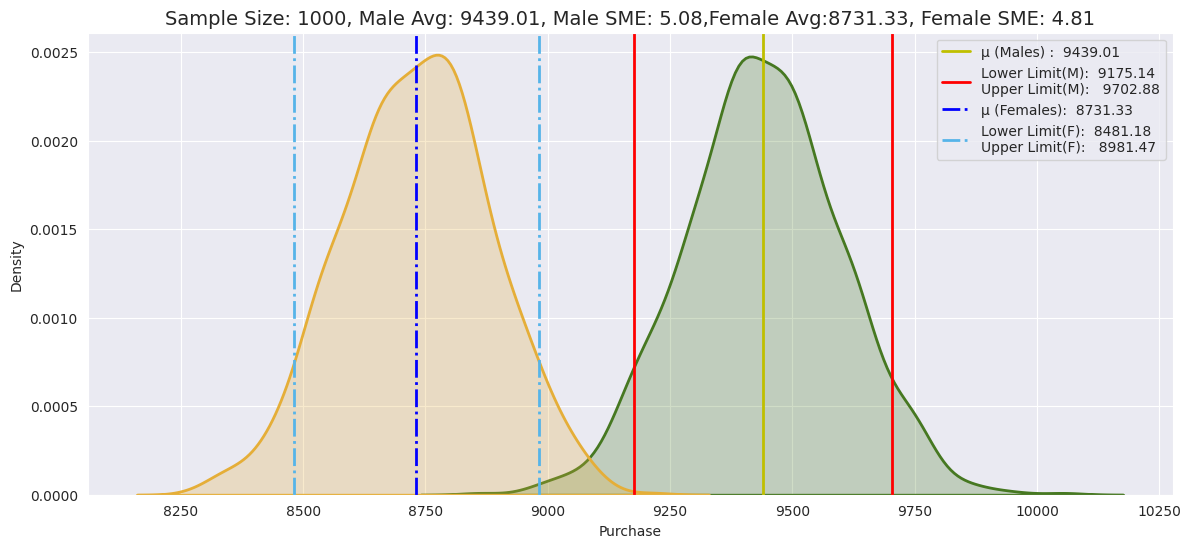

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],1000)

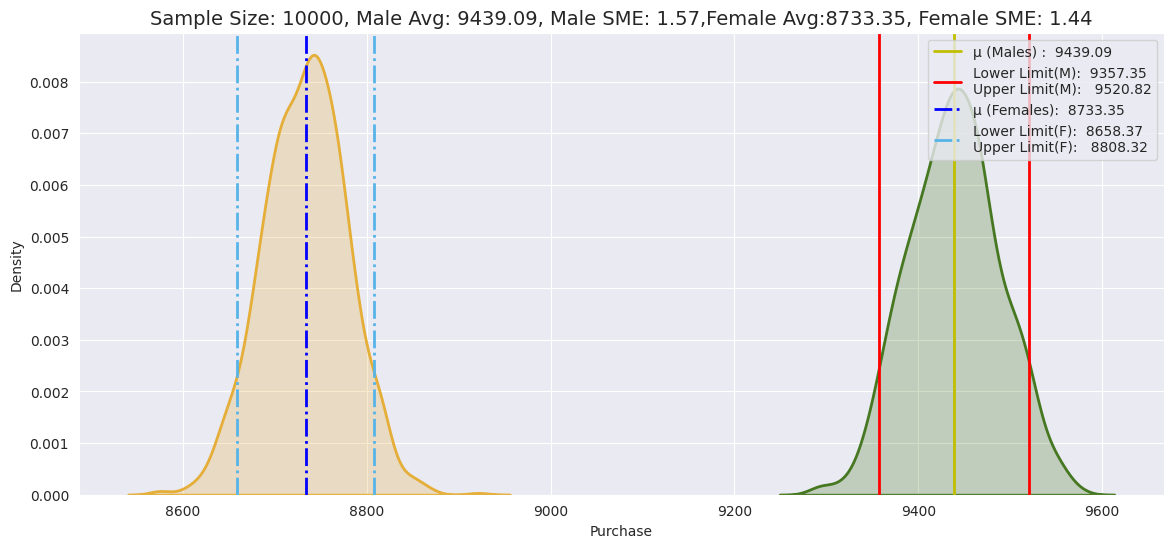

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],10000)

# Inferences
    As the sample size increases, the two groups start to become distinct
    
    With increasing sample size, Standard error of the mean in the samples decreases.
    
    For sample size 10000 is 1.69
    
    For Female (sample size 10000) range for mean purchase with confidence interval 90% is [8658.48, 8811.57]
    
    For Male range for mean purchase with confidence interval 90% is [9347.79, 9523.25]

# CLT Analysis for mean purchase with confidence 95% - Based on Gender

In [ ]:
def bootstrapping(sample1,sample2,sample_size,itr_size=1000,ci=95):
    #Confidence Interval
    ci = ci/100

    #Collecting samples from the overall data for any sample size
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

     #Calcualte the Z-Critical value
    alpha = (1 - (ci/100))/2
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1   = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2   = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)

    label_mean1=("μ (Males) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    label_mean2=("μ (Females):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))

    plt.title(f"Sample Size: {sample_size}, Male Avg: {np.round(mean1, 2)}, Male SME: {np.round(sem1,2)},Female Avg:{np.round(mean2, 2)}, Female SME: {np.round(sem2,2)}",fontsize=14,family = "sans-serif")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    return None



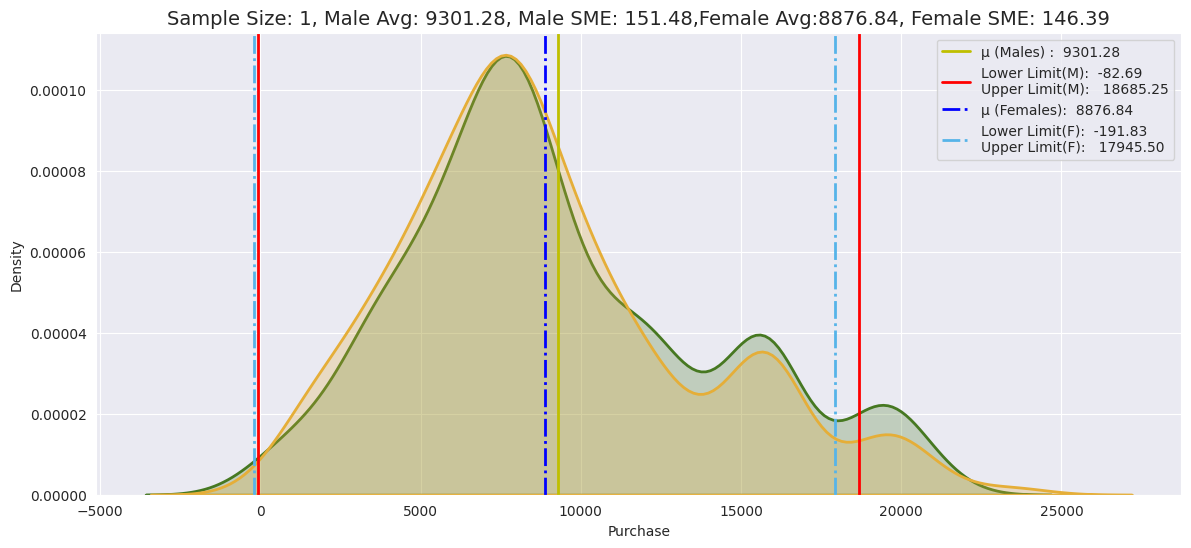

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],1)

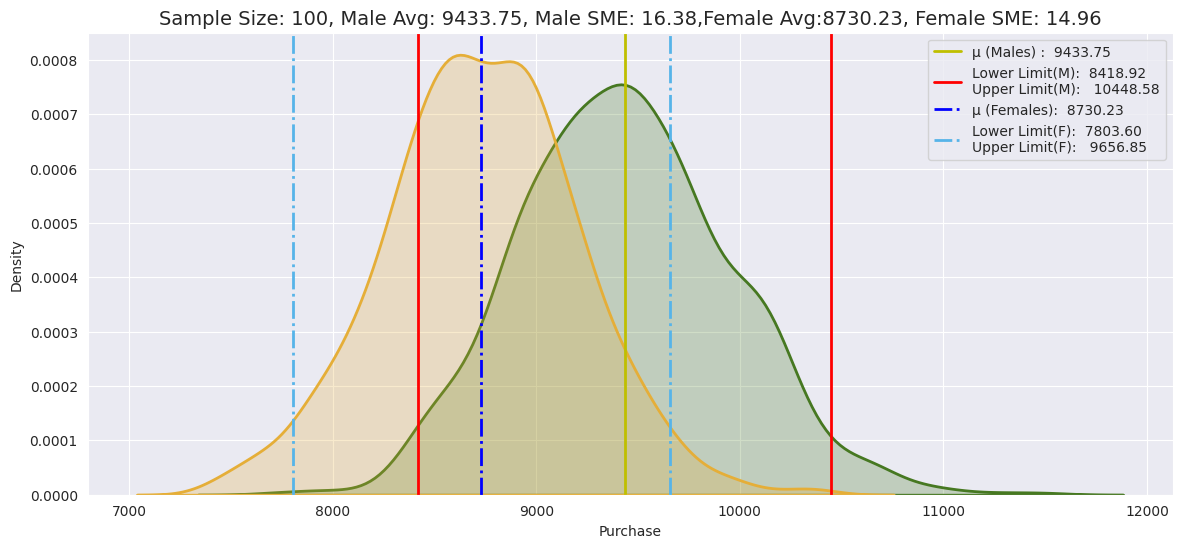

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],100)

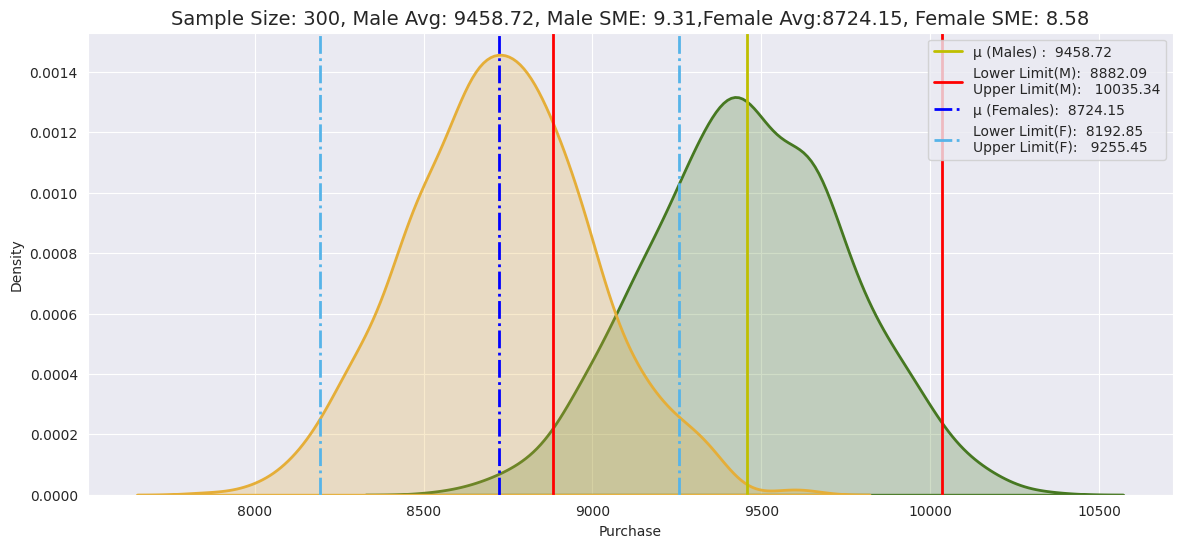

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],300)

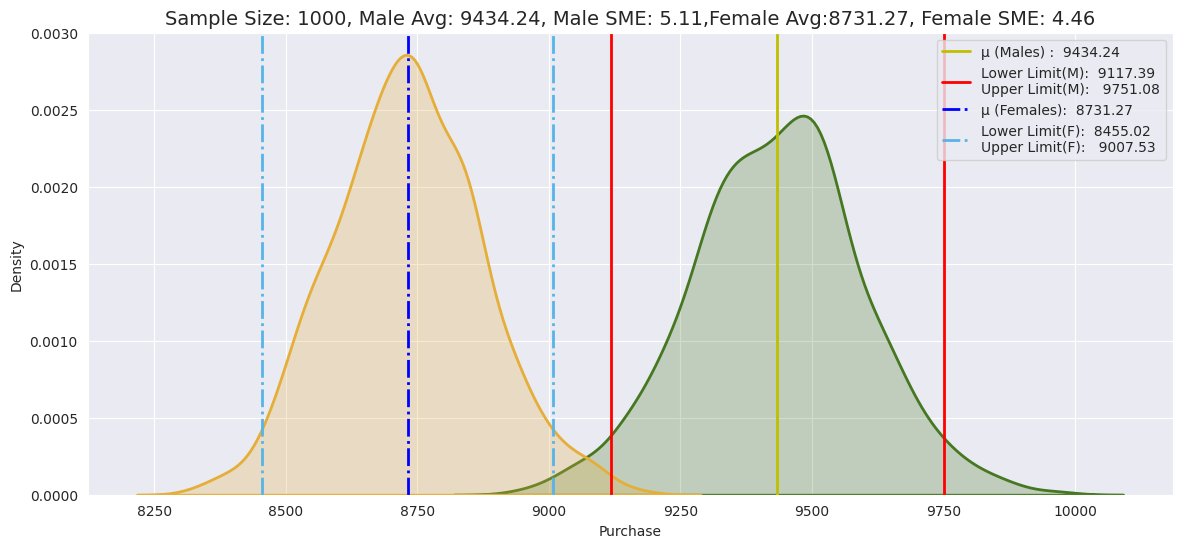

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],1000)

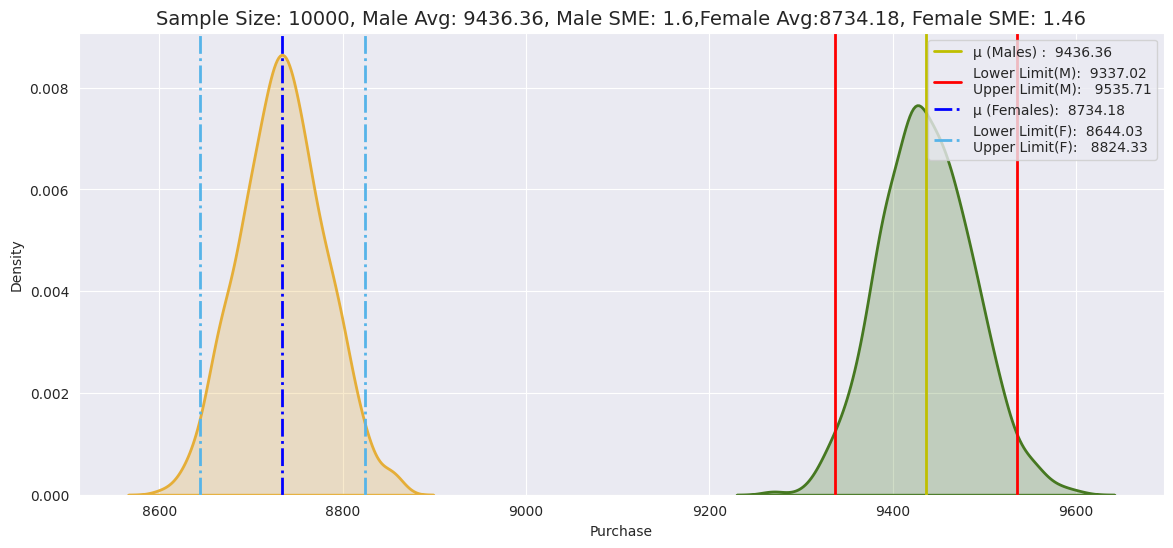

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],10000)

# Inferences
    Using confidence interval 95%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90%-
    
    As the sample size increases, the Male and female groups start to become distinct
    
    With increasing sample size, Standard error of the mean in the samples decreases. For sample size 10000 is 1.64
    
    For Female (sample size 10000) range for mean purchase with confidence interval 95% is [8644.48, 8827.22]
    
    For Male range for mean purchase with confidence interval 95% is [9337.29, 9540.89]
    
    Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.

# CLT Analysis for mean purchase with confidence 99% - Based on Gender

In [ ]:
def bootstrapping(sample1,sample2,sample_size,itr_size=1000,ci=99):
    #Confidence Interval
    ci = ci/100

    #Collecting samples from the overall data for any sample size
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

     #Calcualte the Z-Critical value
    alpha = (1 - (ci/100))/2
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1   = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2   = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)

    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",fontsize=14,family = "sans-serif")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    return None

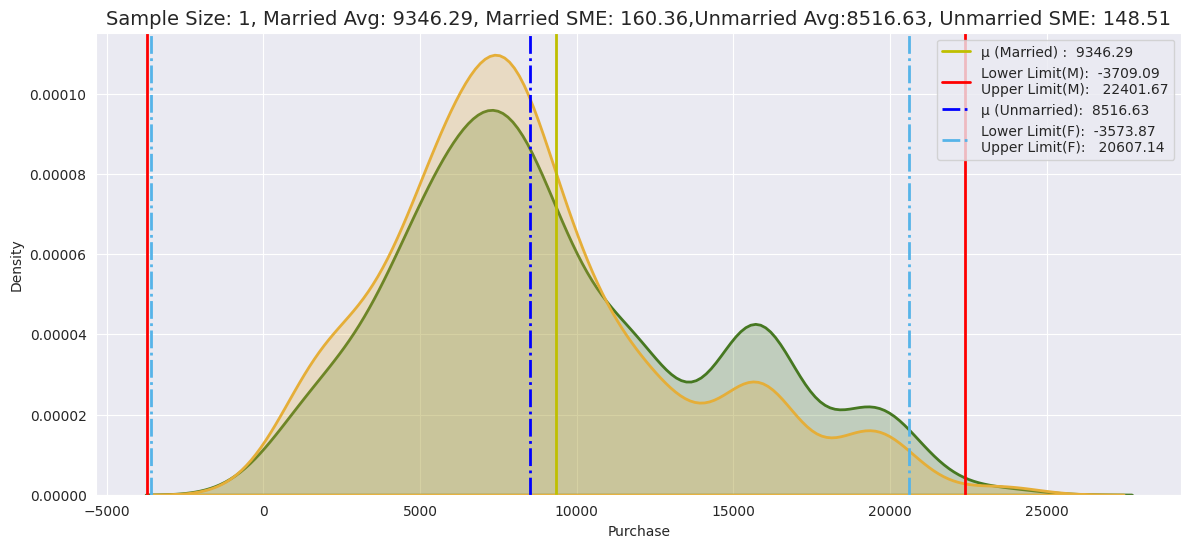

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],1)

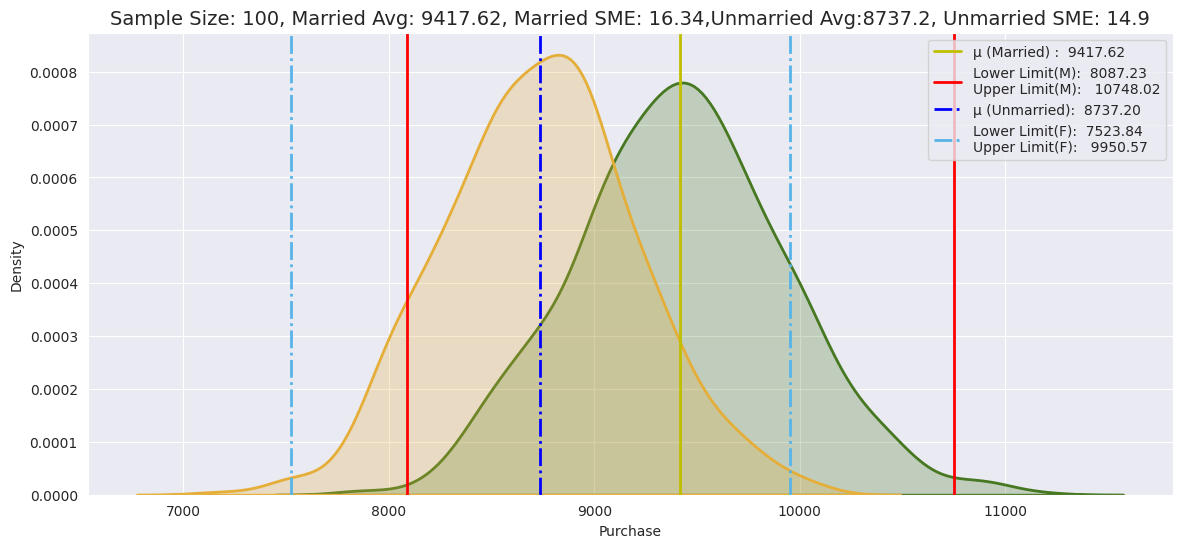

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],100)

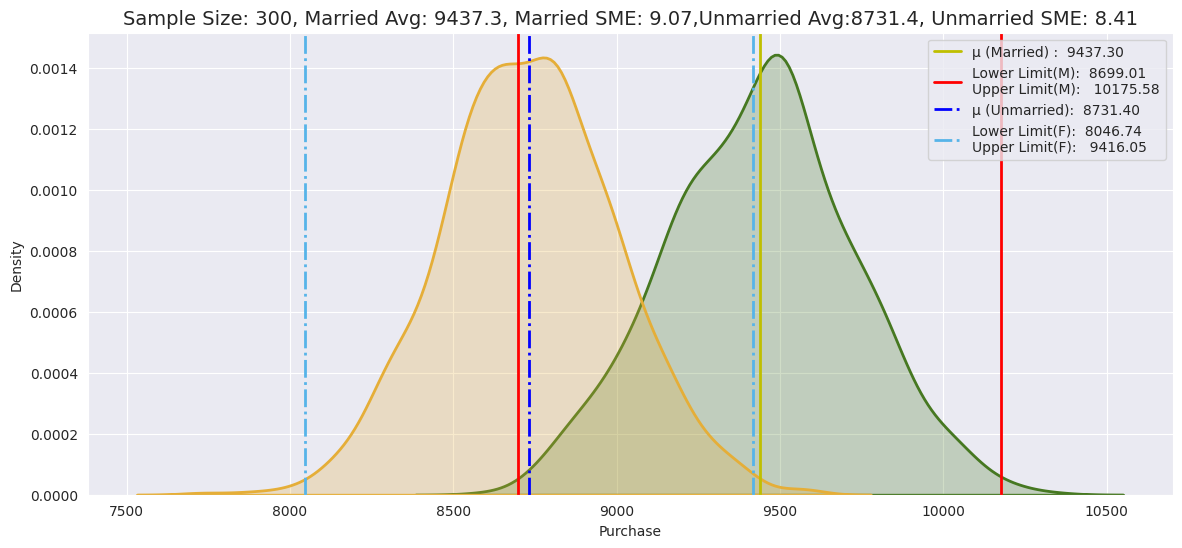

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],300)

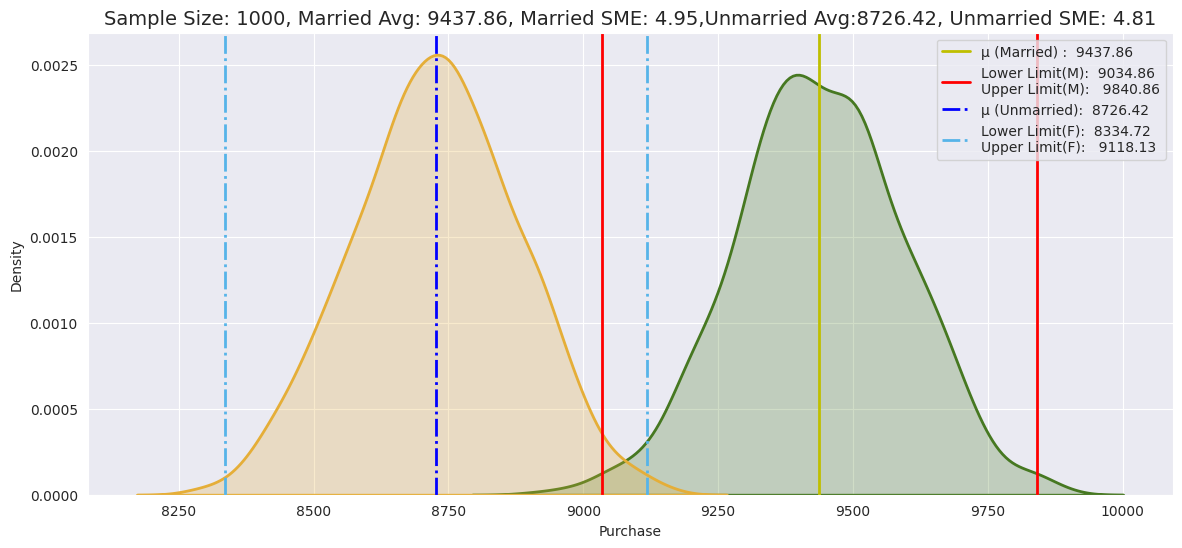

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],1000)

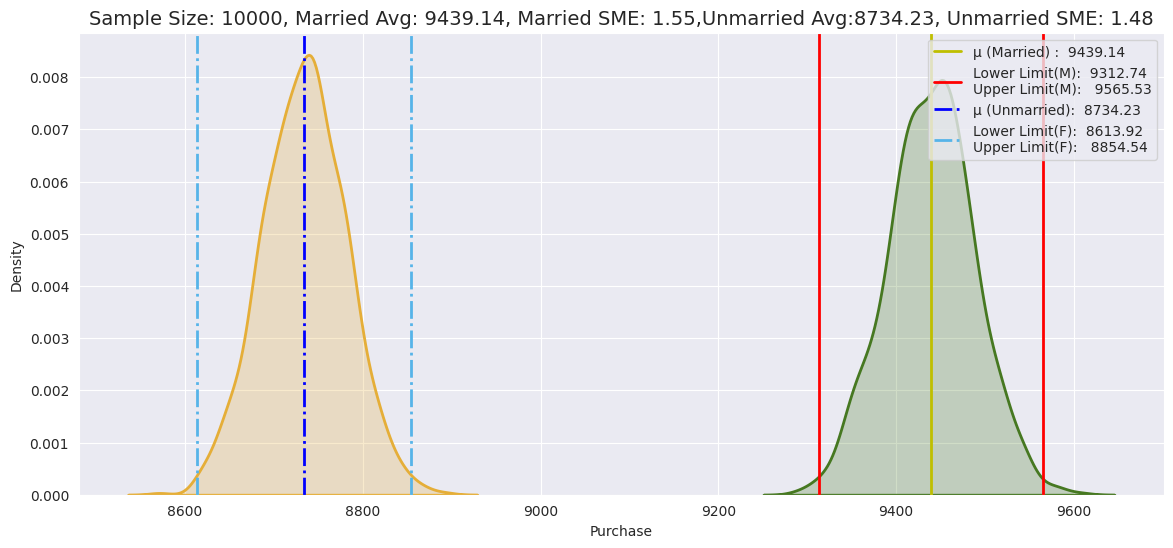

In [ ]:
bootstrapping(df_male['Purchase'],df_female['Purchase'],10000)

# Inferences

    Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%-
    
    As the sample size increases, the Male and female groups start to become distinct
    
    With increasing sample size, Standard error of the mean in the samples decreases. For sample size 10000 is 0.45
    
    For Female (sample size 10000) range for mean purchase with confidence interval 99% is [8617, 8850]
    
    For Male range for mean purchase with confidence interval 99% is [9307, 9566]
    
    When the confidence percentage increases, the spread, that is the difference between the upper and lower limits, also increases.

# CLT Analysis for mean purchase with confidence 99% - Based on Marital Status

In [ ]:
def bootstrapping(sample1,sample2,sample_size,itr_size=1000,ci=99):
    #Confidence Interval
    ci = ci/100

    #Collecting samples from the overall data for any sample size
    sample1_n = [np.mean(sample1.sample(sample_size)) for i in range(itr_size)]
    sample2_n = [np.mean(sample2.sample(sample_size)) for i in range(itr_size)]

     #Calcualte the Z-Critical value
    alpha = (1 - (ci/100))/2
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean1  = np.mean(sample1_n)
    sigma1 = np.std(sample1_n)
    sem1   = stats.sem(sample1_n)

    lower_limit_1 = norm.ppf((1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)
    upper_limit_1 = norm.ppf(ci+(1-ci)/2)*np.std(sample1_n) + np.mean(sample1_n)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean2  = np.mean(sample2_n)
    sigma2 = np.std(sample2_n)
    sem2   = stats.sem(sample2_n)

    lower_limit_2 = norm.ppf((1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)
    upper_limit_2 = norm.ppf(ci + (1-ci)/2)*np.std(sample2_n) + np.mean(sample2_n)

    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data = sample1_n, color="#467821", fill = True, linewidth = 2)
    sns.kdeplot(data = sample2_n ,color='#e5ae38', fill = True, linewidth = 2)

    label_mean1=("μ (Married) :  {:.2f}".format(mean1))
    label_ult1=("Lower Limit(M):  {:.2f}\nUpper Limit(M):   {:.2f}".format(lower_limit_1,upper_limit_1))
    label_mean2=("μ (Unmarried):  {:.2f}".format(mean2))
    label_ult2=("Lower Limit(F):  {:.2f}\nUpper Limit(F):   {:.2f}".format(lower_limit_2,upper_limit_2))

    plt.title(f"Sample Size: {sample_size}, Married Avg: {np.round(mean1, 2)}, Married SME: {np.round(sem1,2)},Unmarried Avg:{np.round(mean2, 2)}, Unmarried SME: {np.round(sem2,2)}",fontsize=14,family = "sans-serif")
    plt.xlabel('Purchase')
    plt.axvline(mean1, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean1)
    plt.axvline(upper_limit_1, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult1)
    plt.axvline(lower_limit_1, color = 'r', linestyle = 'solid', linewidth = 2)
    plt.axvline(mean2, color = 'b', linestyle = 'dashdot', linewidth = 2,label=label_mean2)
    plt.axvline(upper_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2,label=label_ult2)
    plt.axvline(lower_limit_2, color = '#56B4E9', linestyle = 'dashdot', linewidth = 2)
    plt.legend(loc='upper right')

    return None


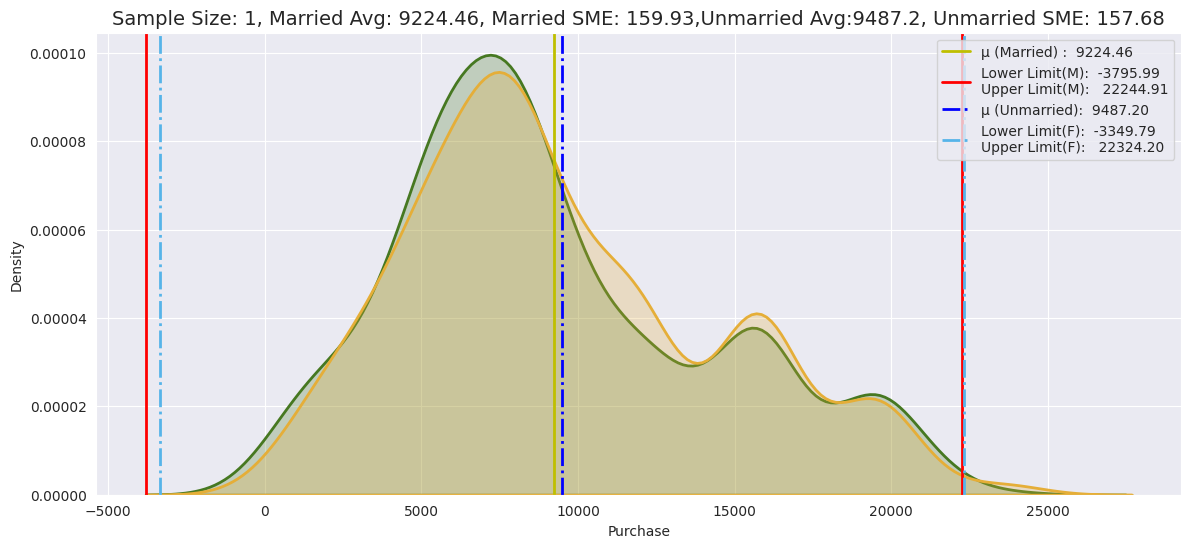

In [ ]:
bootstrapping(df_married['Purchase'],df_unmarried['Purchase'],1)

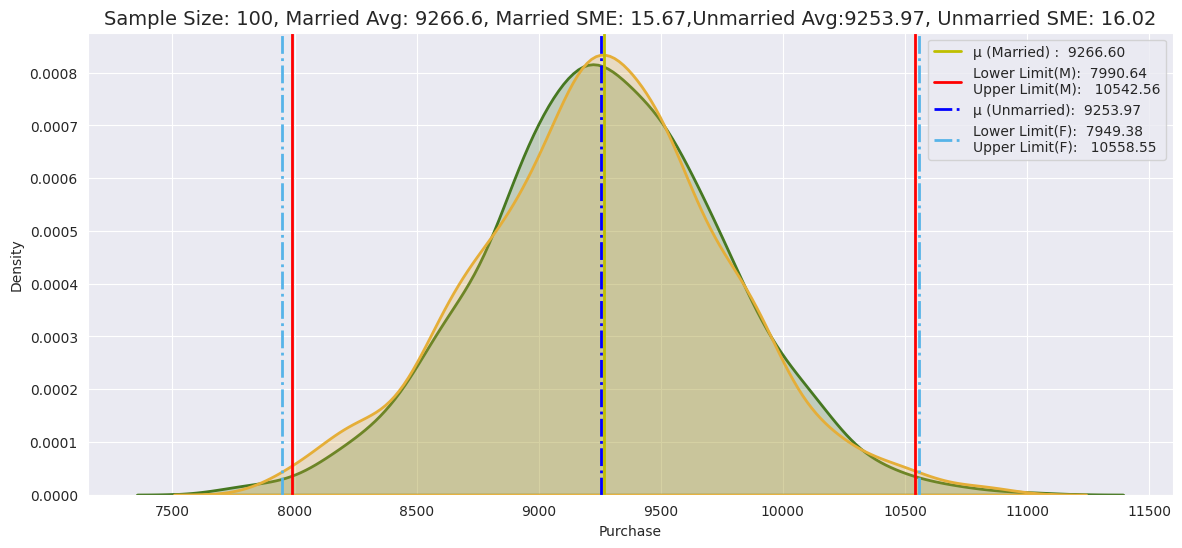

In [ ]:
bootstrapping(df_married['Purchase'],df_unmarried['Purchase'],100)

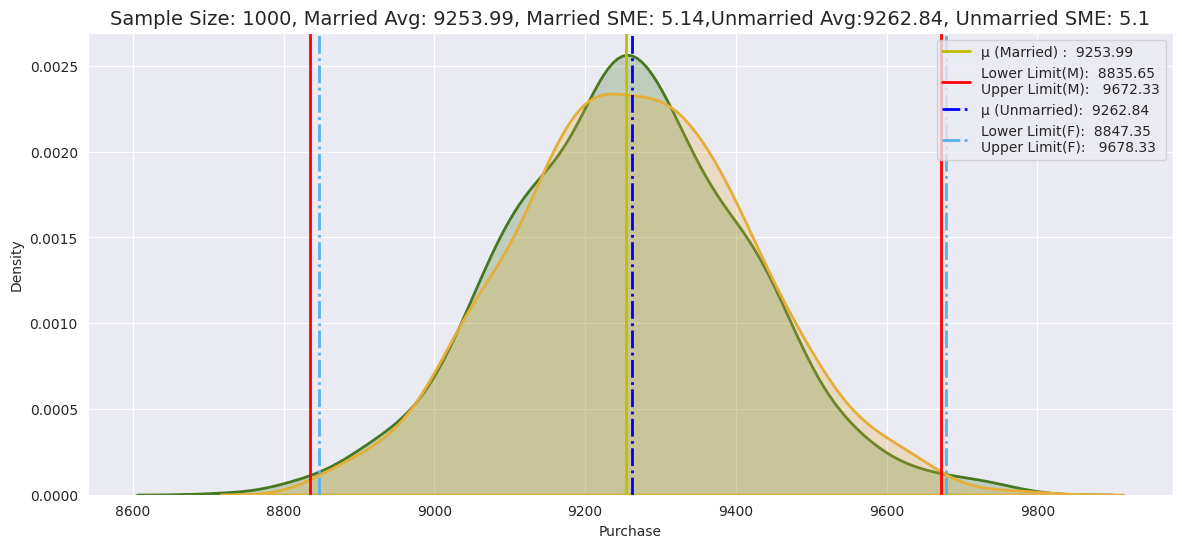

In [ ]:
bootstrapping(df_married['Purchase'],df_unmarried['Purchase'],1000)

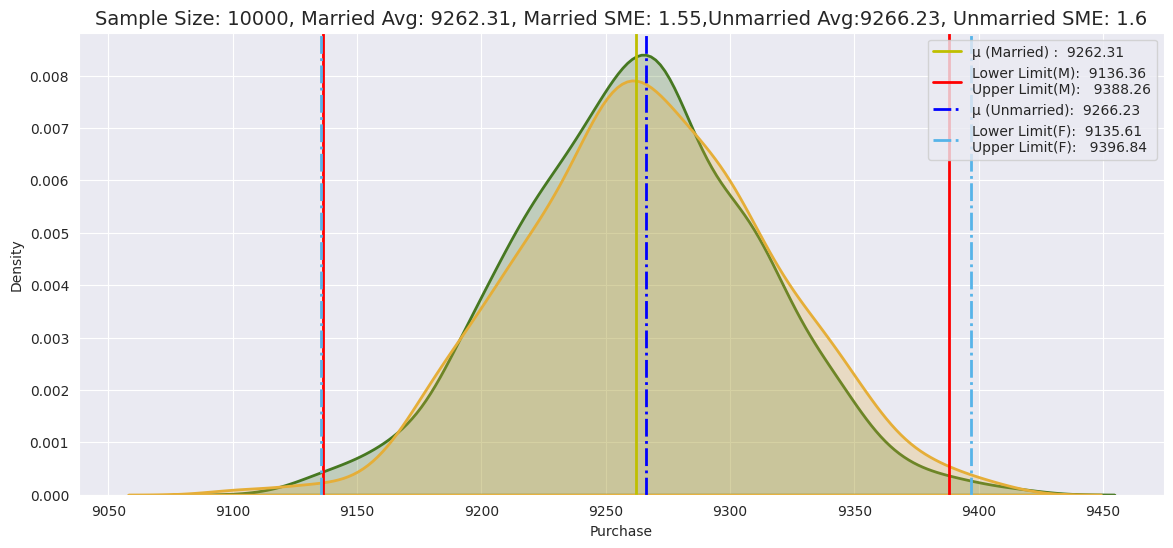

In [ ]:
bootstrapping(df_married['Purchase'],df_unmarried['Purchase'],10000)

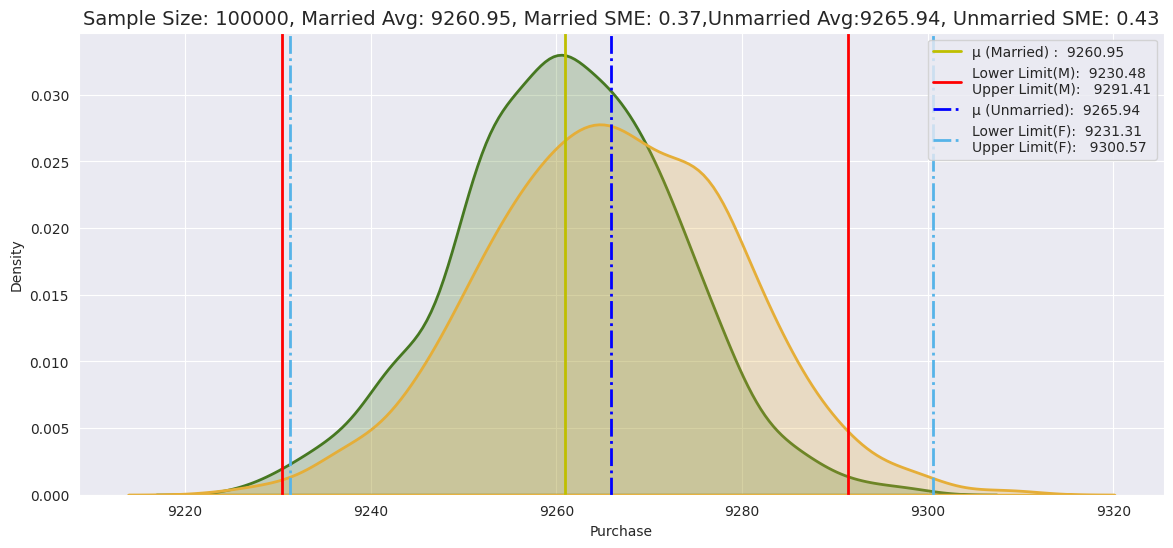

In [ ]:
bootstrapping(df_married['Purchase'],df_unmarried['Purchase'],100000)

    Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
    
    For Unmarried customer (sample size 10000) range for mean purchase with confidence interval 99% is [9232, 9301]
    
    For married customer range for mean purchase with confidence interval 99% is [9230, 9291]

# CLT Analysis for mean purchase with confidence 95% - Based on Age Group

In [ ]:
def bootstrapping_age(sample,sample_size,itr_size=1000,ci=99):


    #Collecting samples from the overall data for any sample size
    sample = [np.mean(sample.sample(sample_size)) for i in range(itr_size)]

     #Calcualte the Z-Critical value
    alpha = (1 - (ci/100))/2
    z_critical = stats.norm.ppf(1 - alpha)

    # Calculate the mean, standard deviation & standard Error of sampling distribution of a sample mean
    mean  = np.mean(sample)
    sigma = np.std(sample)
    sem   = stats.sem(sample)

    lower_limit = mean - (z_critical * sigma)
    upper_limit = mean + (z_critical * sigma)


    fig, ax = plt.subplots(figsize=(14,6))
    sns.set_style("darkgrid")

    sns.kdeplot(data=sample , color="#467821", fill = True, linewidth = 2)

    label_mean=("μ  :  {:.2f}".format(mean))
    label_ult=("Lower Limit:  {:.2f}\nUpper Limit:   {:.2f}".format(lower_limit,upper_limit))


    plt.title(f"Sample Size: {sample_size},Mean:{np.round(mean,2)}, SME:{np.round(sem,2)}",fontsize=14,family="sans-serif")
    plt.xlabel('Purchase')
    plt.axvline(mean, color = 'y', linestyle = 'solid', linewidth = 2,label=label_mean)
    plt.axvline(upper_limit, color = 'r', linestyle = 'solid', linewidth = 2,label=label_ult)
    plt.axvline(lower_limit, color = 'r', linestyle = 'solid', linewidth = 2)

    plt.legend(loc='upper right')

    return mean ,np.round(lower_limit,2),np.round(upper_limit,2)

<ipython-input-263-0264b64b60ce>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, sample_size, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
<ipython-input-263-0264b64b60ce>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, sample_size, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)
<ipython-input-263-0264b64b60ce>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple o

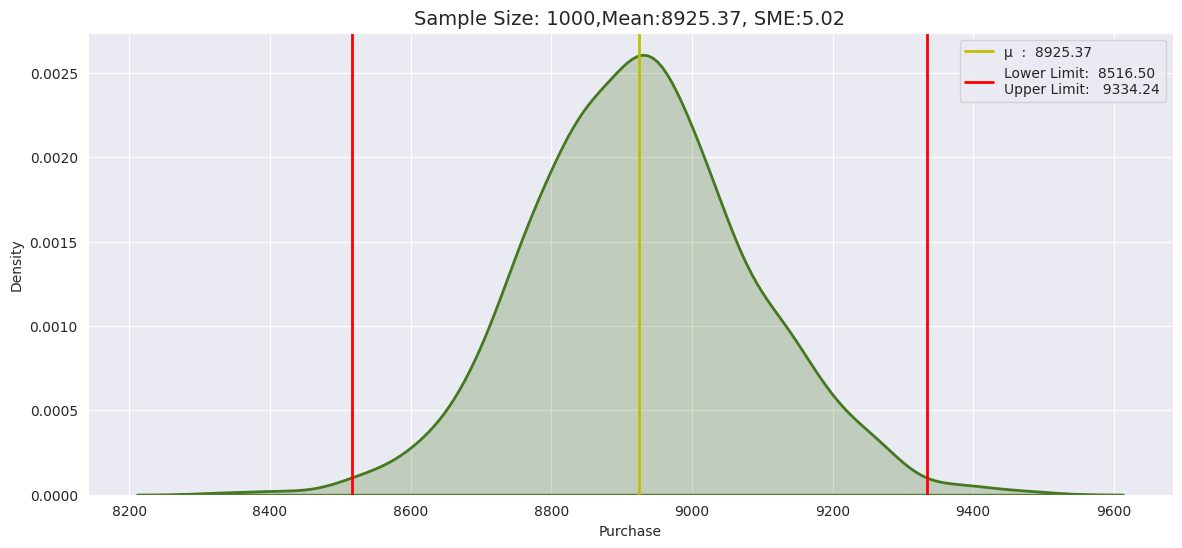

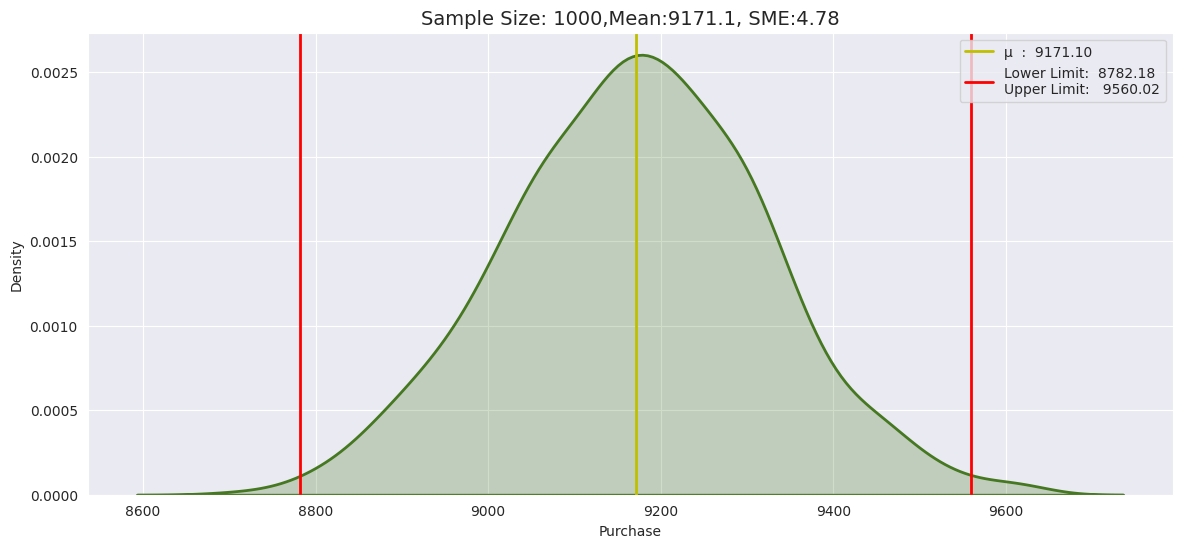

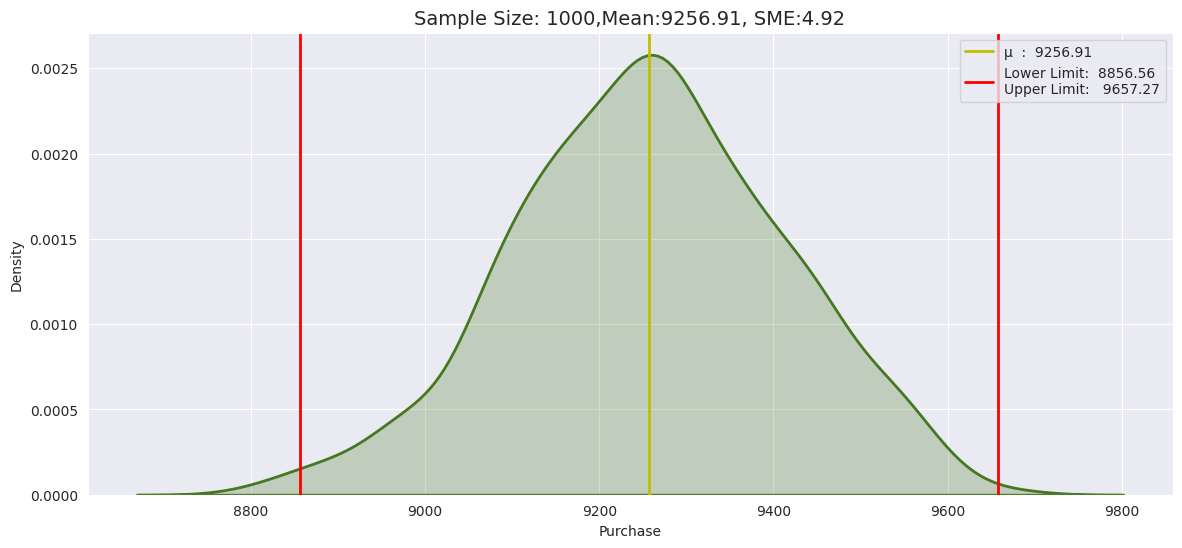

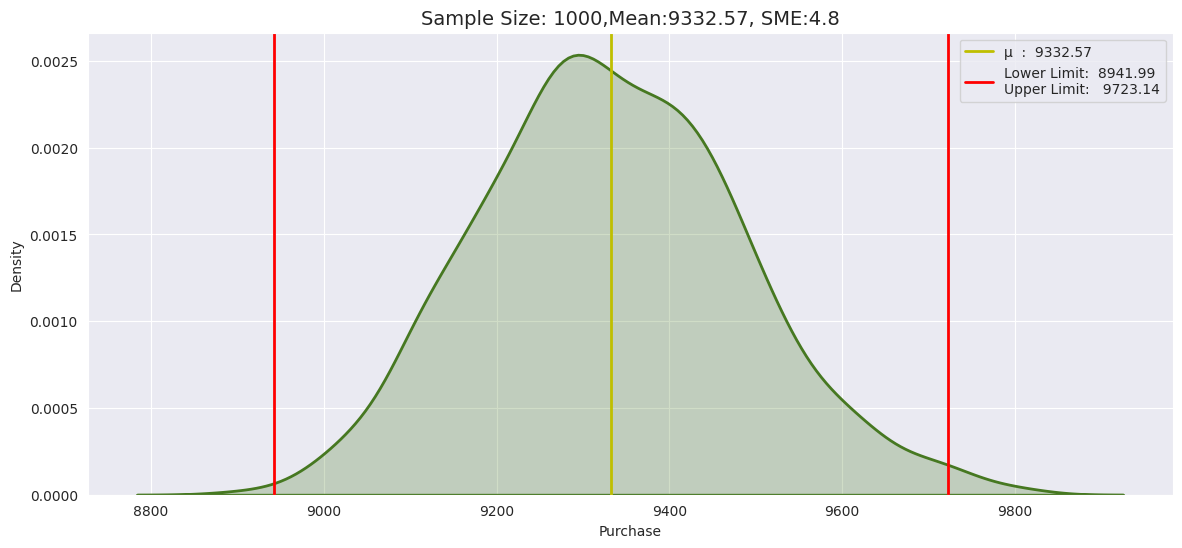

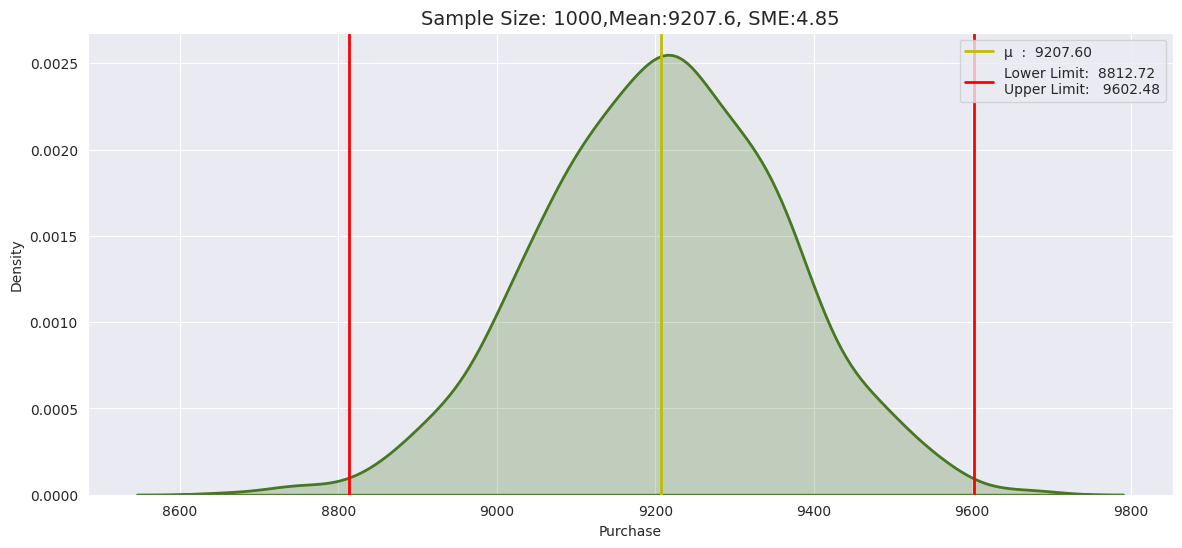

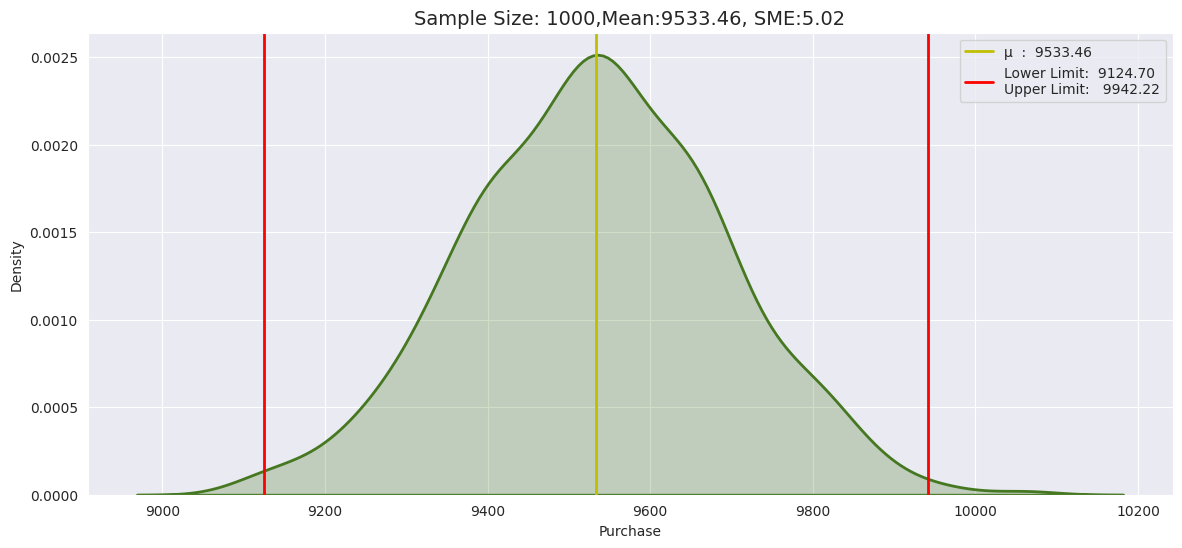

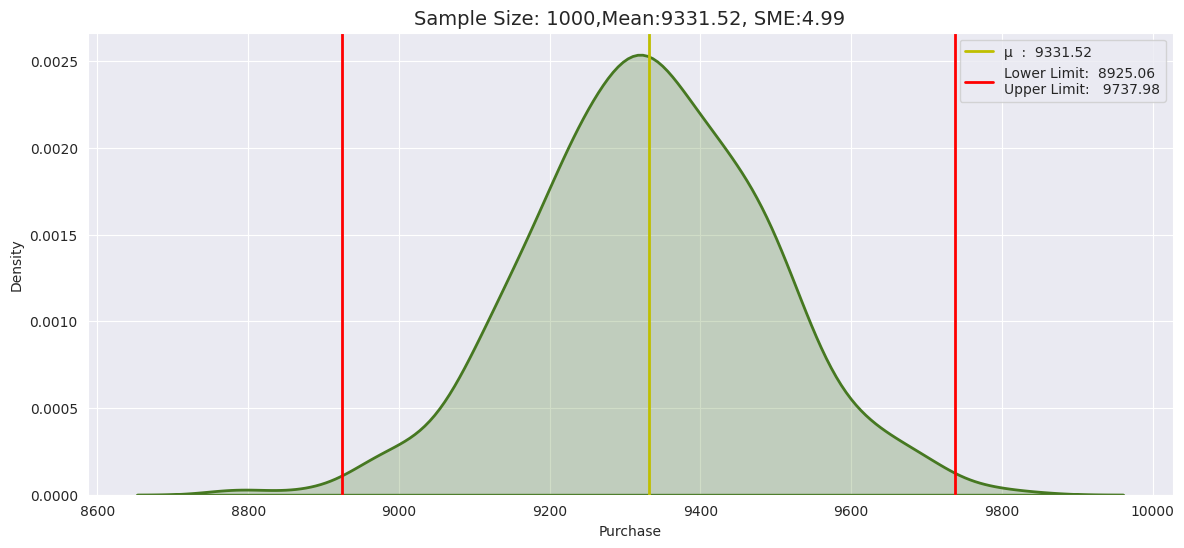

In [ ]:
itr_size = 1000
sample_size = 1000
ci = 99
age_list =['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

array = np.empty((0,8))

for age in age_list:
    mean, ll_m, ul_m = bootstrapping_age(df[df['Age'] == age]['Purchase'],sample_size,itr_size,ci)

    array = np.append(array, np.array([[age,np.round(mean,2), ll_m, ul_m, sample_size, ([ll_m,ul_m]) ,(ul_m-ll_m),99]]), axis=0)

age_data = pd.DataFrame(array, columns = ['Age_Group','Mean','Lower_limit','Upper_limit','Sample_Size','CI','Range','Confidence_pct'])

# Inferences
    Spending by Age_group 0-17 is low compared to other age groups.
    
    Customers in Age_group 51-55 spend the most between 9381.9 and 9463.7

In [ ]:
age_dict = {}
age_list = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for i in range(len(age_data)):
    age_dict[age_list[i]] = age_data.loc[i, "Mean"]

In [ ]:
age_data.head(7)

Age_Group     Mean Lower_limit Upper_limit Sample_Size                  CI  \
0      0-17  8925.37      8516.5     9334.24        1000   [8516.5, 9334.24]   
1     18-25   9171.1     8782.18     9560.02        1000  [8782.18, 9560.02]   
2     26-35  9256.91     8856.56     9657.27        1000  [8856.56, 9657.27]   
3     36-45  9332.57     8941.99     9723.14        1000  [8941.99, 9723.14]   
4     46-50   9207.6     8812.72     9602.48        1000  [8812.72, 9602.48]   
5     51-55  9533.46      9124.7     9942.22        1000   [9124.7, 9942.22]   
6       55+  9331.52     8925.06     9737.98        1000  [8925.06, 9737.98]   

    Range Confidence_pct  
0  817.74             99  
1  777.84             99  
2  800.71             99  
3  781.15             99  
4  789.76             99  
5  817.52             99  
6  812.92             99

Insights:

Confidence Interval by Age
For age 26-35 --> confidence interval of means: [8860.4, 9643.2]

For age 36-45 --> confidence interval of means: [8949.98, 9726.66]
For age 18-25 --> confidence interval of means: [8760.37, 9592.03]
For age 46-50 --> confidence interval of means: [8816.2, 9596.18]
For age 51-55 --> confidence interval of means: [9119.96, 9939.6]
For age 55+ --> confidence interval of means: [8932.75, 9735.27]
For age 0-17 --> confidence interval of means: [8526.97, 9341.76]

# Final Inferences

#  EDA

    The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.
    
    The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the mall multiple times in City Category B.
    
    Majority of Customers purchase within the 5,000 - 20,000 range.
    
    Males clearly purchase more than females. 75% of men and only 25% of women purchase products.
    
    Most mall customers are between the ages of 26 and 35.60% of purchases are made by people between the ages of 26 and 45
    
    City Category B accounts for 42%, City Category C 31%, and City Category A represents 27% of all customer purchases.Purchases are high in city category C
    
    35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
    
    Most mall customers are between the ages of 26 and 35.City category C has more customers between the ages of 18 and 45.
    
    In City Category C, there are slightly more female customers.
    
    Product 5 and 8 is common among females.

    

# Inference using CLT and CI

    As the sample size increases, the two groups start to become distinct. With increasing sample size, Standard error of the mean in the samples decreases. For sample size 10000 is 0.49 with confidence is 90%.
    
    Overlappings are increasing with a confidence interval of 95%. Due to the increasing CI, we consider higher ranges within which the actual population might fall, so that both mean purchase are more likely to fall within the same range.
    
    Using confidence interval 99%, the mean purchase value by gender shows a similar pattern to that found with confidence interval 90% & 95%
    
    For Female (sample size 10000) range for mean purchase with confidence interval 99% is [8617, 8850]
    
    For Male range for mean purchase with confidence interval 99% is [9307, 9566]
    
       
    Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.
    
    Spending by Age_group 0-17 is low compared to other age groups.
    
    Customers in Age_group 51-55 spend the most between [9119.96, 9939.6]

# Recommendations
    In light of the fact that females spend less than males on average, management needs to focus on their specific needs differently. Adding some additional offers for women can increase their spending on Black Friday.

    Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less
    
    Management should come-up with some games in the mall to attract more younger generation will can help them to increase the sale.

    Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers
    
    The management should have some offers on kids (0-17 years) in order to increase sales.

    Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45
        
    In order to attract more young shoppers, they can offer some games for the younger generation.